In [613]:
import pandas as pd
import numpy as np
from numpy import median
import matplotlib.pyplot as plt
import seaborn as sns

import us
from datetime import datetime, timezone

pd.set_option('display.max_columns', 999)

In [614]:
data_path = "C:/Users/armcl/Python/Springboard_Cap2/Data/" #Home
#data_path = "C:/Users/yyzhao/python/Springboard/Capstone1/Data/" #Work

In [615]:
#Read customers data
customers = pd.read_csv(data_path + "Subscription/customers.csv", encoding="utf8")

customers = customers.drop(columns = ['note','ship_street','ship_unit','location',
                                     'wrr','last4','source','customer_metadata',
                                     'ship_phone_number'])

#revenue and mrr need to be divided by 100
customers[['total_revenue','mrr']] = customers[['total_revenue','mrr']]/100

#some observations are missing location data, # of orders, and might have wrong name
#will investigate once merged with other data


In [616]:
#mrr: monthly recurring revenue
#mixed subscription status: once subscribed, cancelled, subscribed again
customers.head(2)

,customer_id,first_name,last_name,american,name,email,ship_to,ship_city,ship_state,ship_zip_code,ship_country,country,total_revenue,mrr,num_orders,num_subscriptions,subscription_status,payment_provider,marketplace_source
0,2739202452,Jennifer,Ting,0,Jennifer Ting,muchenting@hotmail.com,Jennifer Ting,San Ramon,CA,94583,US,US,275.0,23.75,1,1,active,STRIPE,False
1,2729781565,Caelyn,Furman,1,Caelyn Furman,caelyn.furman@gmail.com,Caelyn Furman,Avondale Esates,GA,30002,US,US,185.9,0.00,2,0,none,STRIPE,False


In [617]:
customers.shape

(1320, 19)

In [618]:
customers.describe()

,customer_id,american,total_revenue,mrr,num_orders,num_subscriptions
count,1.320000e+03,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000
mean,2.053670e+09,0.053030,129.265508,6.450795,3.173485,1.017424
std,3.030278e+08,0.224179,172.433666,11.453050,3.426392,0.555215
min,7.880641e+07,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.864414e+09,0.000000,17.960000,0.000000,1.000000,1.000000
50%,1.937069e+09,0.000000,52.875000,0.000000,2.000000,1.000000
75%,2.279912e+09,0.000000,197.770000,20.900000,4.000000,1.000000
max,2.739202e+09,1.000000,1468.920000,95.000000,22.000000,5.000000


In [675]:
##More avg revenue from American families need to focus more on this market
#Analyze state
family_analysis = pd.DataFrame({'count' : customers.groupby( [ 'american'] ).size()})
family_analysis['avg_revenue']=customers.groupby('american').mean()['total_revenue']
family_analysis['total_revenue']= family_analysis['count']*family_analysis['avg_revenue']
family_analysis.sort_values('total_revenue', ascending=False)

,count,avg_revenue,total_revenue
american,,,
0,1250,126.351360,157939.20
1,70,181.303857,12691.27


In [674]:
#Analyze state
state_analysis = pd.DataFrame({'count' : customers.groupby( [ 'ship_state'] ).size()})
state_analysis['avg_revenue']=customers.groupby('ship_state').mean()['total_revenue']
state_analysis['total_revenue']= state_analysis['count']*state_analysis['avg_revenue']
state_analysis.sort_values('total_revenue', ascending=False)

,count,avg_revenue,total_revenue
ship_state,,,
CA,503,114.867256,57778.23
WA,121,137.580826,16647.28
TX,82,180.316951,14785.99
NY,95,129.835158,12334.34
NJ,54,149.992963,8099.62
OH,34,201.547647,6852.62
PA,45,145.669111,6555.11
MA,39,161.445385,6296.37
MD,41,139.972195,5738.86


In [648]:
#More revenue from American families need to focus more on this market
customers.groupby('american').mean()

,customer_id,total_revenue,mrr,num_orders,num_subscriptions,marketplace_source
american,,,,,,
0,2.056710e+09,126.351360,6.374573,3.1664,1.016800,0.002400
1,1.999398e+09,181.303857,7.811905,3.3000,1.028571,0.042857


In [619]:
payment_count = customers.groupby('payment_provider').size()

payment_count/payment_count.sum()

payment_provider
PAYPAL    0.307692
STRIPE    0.692308
dtype: float64

In [678]:
#sub_status = customers.groupby('subscription_status').size()

#sub_status/sub_status.sum()

In [677]:
#Median Revenue by Subscription Status
#Mixed shows the highest total revenue and num of orders, there are many reasons:
#1) clients subscribed, cancelled(didn't like at first, on vacation), came back and subscribed again
#2) accidentally ordered more than needed and cancelled
#3) clients ordered gifts for friends and cancelled/expired later
#4) currently cancelled and there were expired gifts
#5) clients tried several ages first and decided to keep one that fits child's age

#It's hard to interpret with all these different factors
#Need to combine with subscription and cancellation reason data for better information
#For example: cancelled+active vs. cancelled+expired
#customers.groupby('subscription_status').mean()

In [694]:
#Subscription Data

#Use email to merge
#Fullfillment status == 'cancelled': this probably means 
#1)when total_revenue = 0: accidental orders
#2)when total_revenue is not 0 and refunded mad customers

#Date, need to convert to local time for timing analysis, default is PDT
#Questions like1) what time do peoplel like to subscribe/cancel 2)when do they like to open emails and take actions

subscriptions = pd.read_csv(data_path + "Subscription/subscriptions.csv", encoding="utf8")

#Drop columns with all NAs
subscriptions = subscriptions.dropna(axis=1, how='all')

#revenue to numeric
subscriptions['Total Revenue'] = subscriptions['Total Revenue'].replace('[\$,]', '', regex=True).astype(float)

#subscriptions.head(2)

In [695]:
#Merge several columns

subscriptions['Subscription_Product'] = subscriptions[['Subscription Product 1','Subscription Product 2','Subscription Product 3',
               'Subscription Product 4','Subscription Product 5']].apply(lambda x: x.str.cat(sep=''), axis=1)

#Product name changed but essentially the same
subscriptions['Subscription_Product'] = subscriptions['Subscription_Product'].replace({'0-2岁熊猫金袋':'0-2 box',
                                                                                     '0-2岁熊猫盒子':'0-2 box',
                                                                                       '2-5岁熊猫金袋':'2-5 box',
                                                                                     '2-5岁熊猫盒子':'2-5 box',
                                                                                       '5岁+熊猫金袋':'5+ box',
                                                                                     '5岁+熊猫盒子':'5+ box'})

subscriptions['Child_Age'] = subscriptions[[' Subscription Product 1 Survey Field: 宝宝现在几岁了？* ',' Subscription Product 2 Survey Field: 宝宝现在几岁了？* ',' Subscription Product 3 Survey Field: 宝宝现在几岁了？* ',
               ' Subscription Product 4 Survey Field: 宝宝现在几岁了？* ',' Subscription Product 5 Survey Field: 宝宝现在几岁了？* ']].apply(lambda x: x.dropna().astype(str).str.cat(sep=''), axis=1)

subscriptions['Child_Age'] = pd.to_numeric(subscriptions['Child_Age'], errors='coerce')

#age 0 is showing as NA, change them to 0 again
subscriptions['Child_Age'].fillna(0, inplace=True)

subscriptions['Child_Gender'] = subscriptions[['Subscription Product 1 Survey Field: 男娃女娃？*','Subscription Product 2 Survey Field: 男娃女娃？*','Subscription Product 3 Survey Field: 男娃女娃？*',
               'Subscription Product 4 Survey Field: 男娃女娃？*','Subscription Product 5 Survey Field: 男娃女娃？*']].apply(lambda x: x.str.cat(sep=''), axis=1)

subscriptions['Child_Gender'] = subscriptions['Child_Gender'].replace('Girl 女孩','Girl')
subscriptions['Child_Gender'] = subscriptions['Child_Gender'].replace('Boy 男孩','Boy')

subscriptions['Coupon_Used_List'] = subscriptions[['Active Coupon 1','Inactive Coupon 1','Inactive Coupon 2',
               'Inactive Coupon 3']].apply(lambda x: x.str.cat(sep=','), axis=1)

#Create a new variable: if coupon used or not
subscriptions['Coupon_Used'] = 'Coupon_Used'
subscriptions.loc[subscriptions['Coupon_Used_List']=='','Coupon_Used'] = 'No_Coupon_Used'

subscriptions['Is a Gift'] = subscriptions['Is a Gift'].replace({True:'Gift',False:'Not_Gift'})


subscriptions = subscriptions[subscriptions.columns[~subscriptions.columns.str.contains('Survey')]]
subscriptions = subscriptions[subscriptions.columns[~subscriptions.columns.str.contains('Subscription Product')]]
subscriptions = subscriptions[subscriptions.columns[~subscriptions.columns.str.contains('Inactive Coupon')]]
subscriptions = subscriptions[subscriptions.columns[~subscriptions.columns.str.contains('Active Coupon 1')]]
subscriptions = subscriptions[subscriptions.columns[~subscriptions.columns.str.contains('Billing')]]
subscriptions = subscriptions[subscriptions.columns[~subscriptions.columns.str.contains('Recipient')]]


In [696]:
#Deal with time

subscriptions['Start_Date_Long']= pd.to_datetime(subscriptions['Start Date']+'/'+subscriptions['Start Date Time'])
subscriptions['End_Date_Long']= pd.to_datetime(subscriptions['End Date']) 
subscriptions['Cancel_Date_Long']= pd.to_datetime(subscriptions['Last Cancel Date']+'/'+subscriptions['Last Cancel Date Time'].astype(str).str[:-5])
subscriptions['Cancel_Date_Long'].fillna('', inplace=True)

#Conver to local time based on country and state
#Create Time Zones
subscriptions['Time_Zone'] = subscriptions.apply(
    lambda row : us.states.lookup(row['Shipping Province']).capital_tz if ((row['Shipping Country']=='US') & (row['Shipping Province']!='AE')) else "", axis = 1) 

subscriptions.loc[(subscriptions['Shipping Country']=='US') 
                  & (subscriptions['Shipping Province']=='AE'),'Time_Zone'] = 'America/Los_Angeles'

subscriptions.loc[(subscriptions['Shipping Country']=='CA') 
                  & (subscriptions['Shipping Province']=='AB'),'Time_Zone'] = 'America/Denver'

subscriptions.loc[(subscriptions['Shipping Country']=='CA') 
                  & (subscriptions['Shipping Province']=='ON'),'Time_Zone'] = 'America/New_York'

subscriptions.loc[subscriptions['Shipping Country']=='MY','Time_Zone'] = 'Asia/Kuala_Lumpur'

subscriptions['Start_Date_Long'] = subscriptions.apply(lambda row : row['Start_Date_Long'].tz_localize('America/Los_Angeles').tz_convert(row['Time_Zone']), axis = 1)

subscriptions['Cancel_Date_Long'] = subscriptions.apply(lambda row : row['Cancel_Date_Long'].tz_localize('America/Los_Angeles').tz_convert(row['Time_Zone']) if row['Cancel_Date_Long']!='' else "", axis = 1)



In [697]:
#Create new features

#Window from subscription to cancellation
subscriptions.loc[subscriptions['Cancel_Date_Long']!='','canceled_tenure'] = subscriptions.loc[subscriptions['Cancel_Date_Long']!='','Cancel_Date_Long'] - subscriptions.loc[subscriptions['Cancel_Date_Long']!='','Start_Date_Long']
subscriptions['canceled_tenure'] = subscriptions.apply(lambda row: row['canceled_tenure'].days,axis=1)

#Tenue for active subscribers
subscriptions.loc[subscriptions['Cancel_Date_Long']=='','active_tenure'] = datetime.now() - pd.to_datetime(subscriptions['Start Date'])
subscriptions['active_tenure'] = subscriptions.apply(lambda row: row['active_tenure'].days,axis=1)

#subscribed/cancelled date and time
subscriptions['subscribe_date'] = subscriptions.apply(lambda row: row['Start_Date_Long'].day if row['Start_Date_Long']!='' else '',axis=1)
subscriptions['subscribe_hour'] = subscriptions.apply(lambda row: row['Start_Date_Long'].hour if row['Start_Date_Long']!='' else '',axis=1)
subscriptions['cancel_date'] = subscriptions.apply(lambda row: row['Cancel_Date_Long'].day if row['Cancel_Date_Long']!='' else '',axis=1)
subscriptions['cancel_hour'] = subscriptions.apply(lambda row: row['Cancel_Date_Long'].hour if row['Cancel_Date_Long']!='' else '',axis=1)


In [702]:
#Cancellation is more likely at round 17th which is the renewal date
subscriptions.groupby('cancel_date').size().sort_values(ascending=False)

cancel_date
      311
17    169
18     94
16     70
14     50
10     41
15     39
12     39
13     39
7      37
11     35
8      34
9      31
1      31
6      28
5      25
23     25
22     24
19     24
28     23
30     21
24     18
21     17
31     17
3      16
29     16
26     15
4      14
2      12
20     11
27     10
25      7
dtype: int64

In [704]:
#People are more likely to cancel at nights
subscriptions.groupby('cancel_hour').size().sort_values(ascending=False)

cancel_hour
      311
22    109
21    100
11     78
23     66
10     63
9      60
20     59
13     55
0      53
14     51
15     49
16     41
8      41
19     38
17     36
12     36
18     26
1      23
7      17
6      13
2      10
5       6
3       2
dtype: int64

In [705]:
#People are more likely to subscribe 1 week before the subscription cutoff date
#probably due to promotions
subscriptions.groupby('subscribe_date').size().sort_values(ascending=False)

subscribe_date
7     133
30     92
1      82
5      78
17     57
29     57
6      57
3      55
22     49
2      47
4      44
9      43
18     42
26     39
10     38
27     36
25     33
21     31
13     30
12     30
8      28
11     28
16     27
19     27
23     27
14     24
31     24
24     23
15     22
20     21
28     19
dtype: int64

In [706]:
subscriptions.groupby('subscribe_hour').size().sort_values(ascending=False)

subscribe_hour
22    129
21    127
15    111
14     93
11     86
23     84
12     83
16     81
20     75
10     74
13     68
17     59
9      54
19     52
0      45
18     38
8      31
6      15
1      15
7      12
2       8
3       2
4       1
dtype: int64

In [626]:
#Create dummy variables
subscriptions = pd.concat([subscriptions, subscriptions['Subscription_Product'].str.get_dummies(sep=',')], axis=1)
subscriptions = pd.concat([subscriptions, subscriptions['Term'].str.get_dummies(sep=',')], axis=1)
subscriptions = pd.concat([subscriptions, subscriptions['Status'].str.get_dummies(sep=',')], axis=1)
subscriptions = pd.concat([subscriptions, subscriptions['Coupon_Used'].str.get_dummies(sep=',')], axis=1)
subscriptions = pd.concat([subscriptions, subscriptions['Is a Gift'].str.get_dummies(sep=',')], axis=1)
#subscriptions = pd.concat([subscriptions, subscriptions['Source'].str.get_dummies(sep=',')], axis=1)
subscriptions = pd.concat([subscriptions, subscriptions['Child_Gender'].str.get_dummies(sep=',')], axis=1)
subscriptions = pd.concat([subscriptions, subscriptions['Coupon_Used_List'].str.get_dummies(sep=',')], axis=1)

#Remove features not relevant
subscriptions = subscriptions.drop(columns=['Start Date','Start Date Time','End Date',
                                           'Last Cancel Date','Last Cancel Date Time',
                                           'Auto-Renewing Subscription','Source','Shipping Address 1',
                                           'Shipping Address 2','Time_Zone'])

#If fullfillment status = cancelled AND revenue = 0 
#Then these are accidentally placed duplicate orders, and cancelled by the merchant need to remove from the data

subscriptions = subscriptions.drop(subscriptions[(subscriptions['Fulfillment Status'] == 'CANCELLED') & (subscriptions['Total Revenue'] == 0)].index)

#Also, remove VIP FREE subscriptions 
subscriptions = subscriptions.loc[subscriptions['DIYA']!=1,:]
subscriptions = subscriptions.loc[subscriptions['USMAMAVIP']!=1,:]
subscriptions = subscriptions.loc[subscriptions['MESSYCOWVIP']!=1,:]

In [627]:
subscriptions.head()

,Subscription ID,First Name,Last Name,Email,Status,Total Revenue,Fulfillment Status,Is a Gift,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Initial Order ID,Term,Subscription_Product,Child_Age,Child_Gender,Coupon_Used_List,Coupon_Used,Start_Date_Long,End_Date_Long,Cancel_Date_Long,canceled_tenure,active_tenure,0-2 box,2-5 box,5+ box,12 Month Prepay,Month to Month,active,cancelled,expired,Coupon_Used,No_Coupon_Used,Gift,Not_Gift,Boy,Girl,1STPANDA10OFF,DDDHHHZZZ,DIYA,ERXIGUO,GALA,GALTOGETHER10OFF,GALTOGETHER10OFF3M,GT1STFREE,GTFRESH,GTLOVE,GTLUCKY,GTMOM,GTNIAN,GTPANDA3M,GTSPRING,GTXMAS,GXFXXMHZ,HAPPY100DAYS,HEYWOW,HOTPANDA,KKMANDARIN,LIHANPANDA,LIHANSBOOKNEST,LINGOBUS,LOVECX,LUCKYMAMA,LUCKYMOM,LUCKYPANDA,LUCKYU,MDYANG,MESSYCOW,MESSYCOWVIP,MOLO,NIUMAVIP,PANDA09,PANDA10,PANDA127,PANDA1STFREE,PANDA54,PANDABUNNY,PANDACJ,PANDALOVE,PANDAMOM,PANDAMYDEAR,PANDAPICKUP,PANDAREUNION,PANDASHOP10,PANDASPRING,PANDAYAO,PANDAYEAR,RF2GET1FREE,RF3GET1FREE,RF6GET2NDFREE,SHIP50,SPONGELAB,USMAMA,USMAMA1Y,USMAMAVIP,USMAMAZJ,VIPFIRSTFREE,VIPFREEINF,VIPINFLUENCER,WEEE,WEEEVIP,XM,XMBABA,XMJSLH,XMPANDA,XMSEA,XMTTCD,XMVIP,XMXQ,XPANDA,XQDW,XQDWPD,YWZGG,ZYLYZXY
0,2739202500,Jennifer,Ting,muchenting@hotmail.com,active,275.00,OPEN,Not_Gift,San Ramon,94583,CA,US,2739202463,12 Month Prepay,0-2 box,1.5,Boy,USMAMA1Y,Coupon_Used,2020-02-11 01:30:24-08:00,2021-02-17,,NaN,10.0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2733195384,Shen,Qu,aliry111@hotmail.com,active,285.00,OPEN,Not_Gift,Clarksburg,20871,MD,US,2733195305,12 Month Prepay,2-5 box,4.5,Girl,WEEEVIP,Coupon_Used,2020-02-08 09:30:07-05:00,2021-02-17,,NaN,13.0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2721329780,Weiyi,Zhen,zhenweiyi@hotmail.com,active,285.00,OPEN,Not_Gift,San Francisco,94112-4264,CA,US,2721329647,12 Month Prepay,0-2 box,2.5,Girl,,No_Coupon_Used,2020-02-02 17:54:50-08:00,2021-01-17,,NaN,19.0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2715898054,Jingwen,Zhen,zjeanwen@hotmail.com,active,18.72,CLOSED,Not_Gift,Chicago,60616,IL,US,2715897946,Month to Month,2-5 box,2.5,Girl,USMAMA,Coupon_Used,2020-01-31 14:54:01-06:00,2020-02-17,,NaN,21.0,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2707797439,Xiaoqi,Wu,lenkywu@gmail.com,active,285.00,OPEN,Not_Gift,Lockport,14094-5716,NY,US,2707797304,12 Month Prepay,0-2 box,1.5,Girl,,No_Coupon_Used,2020-01-29 07:55:18-05:00,2021-01-17,,NaN,23.0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


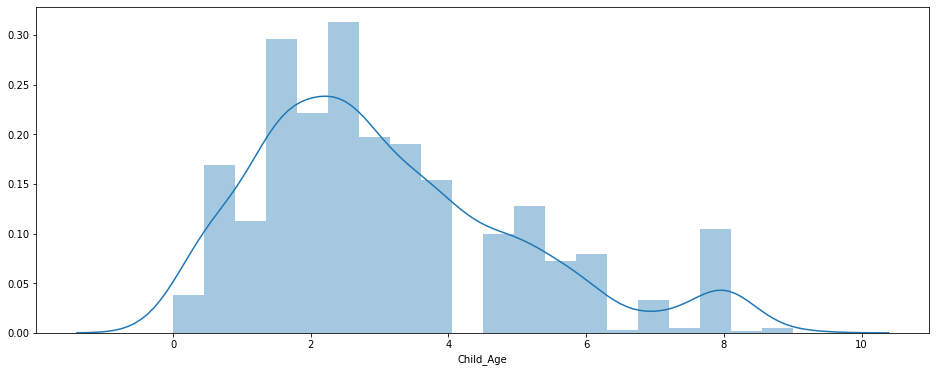

In [708]:
#Plot the distribution of child age
#Long tail on the right
plt.figure(figsize=(16, 6))
ax = sns.distplot(subscriptions['Child_Age'])
plt.show()

In [628]:
subscriptions.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1289 entries, 0 to 1342
Data columns (total 115 columns):
Subscription ID         1289 non-null int64
First Name              1289 non-null object
Last Name               1282 non-null object
Email                   1289 non-null object
Status                  1289 non-null object
Total Revenue           1289 non-null float64
Fulfillment Status      1289 non-null object
Is a Gift               1289 non-null object
Shipping City           1289 non-null object
Shipping Zip            1289 non-null object
Shipping Province       1289 non-null object
Shipping Country        1289 non-null object
Initial Order ID        1289 non-null int64
Term                    1289 non-null object
Subscription_Product    1289 non-null object
Child_Age               1289 non-null float64
Child_Gender            1289 non-null object
Coupon_Used_List        1289 non-null object
Coupon_Used             1289 non-null object
Start_Date_Long         1289 non-null

In [629]:
subscriptions.describe()

,Subscription ID,Total Revenue,Initial Order ID,Child_Age,canceled_tenure,active_tenure,0-2 box,2-5 box,5+ box,12 Month Prepay,Month to Month,active,cancelled,expired,Coupon_Used,No_Coupon_Used,Gift,Not_Gift,Boy,Girl,1STPANDA10OFF,DDDHHHZZZ,DIYA,ERXIGUO,GALA,GALTOGETHER10OFF,GALTOGETHER10OFF3M,GT1STFREE,GTFRESH,GTLOVE,GTLUCKY,GTMOM,GTNIAN,GTPANDA3M,GTSPRING,GTXMAS,GXFXXMHZ,HAPPY100DAYS,HEYWOW,HOTPANDA,KKMANDARIN,LIHANPANDA,LIHANSBOOKNEST,LINGOBUS,LOVECX,LUCKYMAMA,LUCKYMOM,LUCKYPANDA,LUCKYU,MDYANG,MESSYCOW,MESSYCOWVIP,MOLO,NIUMAVIP,PANDA09,PANDA10,PANDA127,PANDA1STFREE,PANDA54,PANDABUNNY,PANDACJ,PANDALOVE,PANDAMOM,PANDAMYDEAR,PANDAPICKUP,PANDAREUNION,PANDASHOP10,PANDASPRING,PANDAYAO,PANDAYEAR,RF2GET1FREE,RF3GET1FREE,RF6GET2NDFREE,SHIP50,SPONGELAB,USMAMA,USMAMA1Y,USMAMAVIP,USMAMAZJ,VIPFIRSTFREE,VIPFREEINF,VIPINFLUENCER,WEEE,WEEEVIP,XM,XMBABA,XMJSLH,XMPANDA,XMSEA,XMTTCD,XMVIP,XMXQ,XPANDA,XQDW,XQDWPD,YWZGG,ZYLYZXY
count,1.289000e+03,1289.000000,1.289000e+03,1289.000000,980.000000,309.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.0,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.0,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.0,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000
mean,2.050825e+09,108.424438,2.050824e+09,3.098324,76.957143,282.569579,0.323507,0.539178,0.137316,0.193949,0.806051,0.239721,0.705198,0.055081,0.771140,0.228860,0.051202,0.948798,0.489527,0.510473,0.010861,0.008534,0.0,0.009310,0.000776,0.001552,0.006982,0.009310,0.002327,0.002327,0.004655,0.002327,0.001552,0.000776,0.003103,0.016292,0.000776,0.000776,0.002327,0.107060,0.002327,0.001552,0.000776,0.005431,0.005431,0.006982,0.001552,0.169899,0.003103,0.000776,0.003103,0.0,0.003879,0.003103,0.080683,0.001552,0.012413,0.003103,0.000776,0.008534,0.013964,0.004655,0.001552,0.000776,0.008534,0.405741,0.000776,0.005431,0.003103,0.000776,0.000776,0.017067,0.000776,0.003103,0.000776,0.036462,0.003103,0.0,0.003103,0.015516,0.000776,0.000776,0.001552,0.000776,0.000776,0.003103,0.001552,0.024050,0.000776,0.002327,0.026377,0.001552,0.014740,0.003103,0.003103,0.001552,0.003879
std,2.703128e+08,136.741522,2.703110e+08,1.927760,98.467886,167.173075,0.467996,0.498656,0.344314,0.395543,0.395543,0.427079,0.456131,0.228228,0.420262,0.420262,0.220496,0.220496,0.500084,0.500084,0.103689,0.092019,0.0,0.096073,0.027853,0.039375,0.083299,0.096073,0.048206,0.048206,0.068093,0.048206,0.039375,0.027853,0.055641,0.126644,0.027853,0.027853,0.048206,0.309309,0.048206,0.039375,0.027853,0.073521,0.073521,0.083299,0.039375,0.375690,0.055641,0.027853,0.055641,0.0,0.062185,0.055641,0.272453,0.039375,0.110762,0.055641,0.027853,0.092019,0.117388,0.068093,0.039375,0.027853,0.092019,0.491225,0.027853,0.073521,0.055641,0.027853,0.027853,0.129573,0.027853,0.055641,0.027853,0.187510,0.055641,0.0,0.055641,0.123641,0.027853,0.027853,0.039375,0.027853,0.027853,0.055641,0.039375,0.153263,0.027853,0.048206,0.160316,0.039375,0.120558,0.055641,0.055641,0.039375,0.062185
min,1.718908e+09,0.000000,1.718908e+09,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [630]:
#Group by subscription status
#some expired are due to CC expired (a nice way to cancel :()
subscriptions.groupby('Status').size()

Status
active       309
cancelled    909
expired       71
dtype: int64

In [631]:
subscriptions.groupby('Status').mean()

,Subscription ID,Total Revenue,Initial Order ID,Child_Age,canceled_tenure,active_tenure,0-2 box,2-5 box,5+ box,12 Month Prepay,Month to Month,active,cancelled,expired,Coupon_Used,No_Coupon_Used,Gift,Not_Gift,Boy,Girl,1STPANDA10OFF,DDDHHHZZZ,DIYA,ERXIGUO,GALA,GALTOGETHER10OFF,GALTOGETHER10OFF3M,GT1STFREE,GTFRESH,GTLOVE,GTLUCKY,GTMOM,GTNIAN,GTPANDA3M,GTSPRING,GTXMAS,GXFXXMHZ,HAPPY100DAYS,HEYWOW,HOTPANDA,KKMANDARIN,LIHANPANDA,LIHANSBOOKNEST,LINGOBUS,LOVECX,LUCKYMAMA,LUCKYMOM,LUCKYPANDA,LUCKYU,MDYANG,MESSYCOW,MESSYCOWVIP,MOLO,NIUMAVIP,PANDA09,PANDA10,PANDA127,PANDA1STFREE,PANDA54,PANDABUNNY,PANDACJ,PANDALOVE,PANDAMOM,PANDAMYDEAR,PANDAPICKUP,PANDAREUNION,PANDASHOP10,PANDASPRING,PANDAYAO,PANDAYEAR,RF2GET1FREE,RF3GET1FREE,RF6GET2NDFREE,SHIP50,SPONGELAB,USMAMA,USMAMA1Y,USMAMAVIP,USMAMAZJ,VIPFIRSTFREE,VIPFREEINF,VIPINFLUENCER,WEEE,WEEEVIP,XM,XMBABA,XMJSLH,XMPANDA,XMSEA,XMTTCD,XMVIP,XMXQ,XPANDA,XQDW,XQDWPD,YWZGG,ZYLYZXY
Status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
active,2.195282e+09,281.873883,2.195277e+09,3.037961,NaN,282.569579,0.213592,0.666667,0.119741,0.653722,0.346278,1.0,0.0,0.0,0.485437,0.514563,0.029126,0.970874,0.404531,0.595469,0.012945,0.009709,0.0,0.006472,0.0000,0.0000,0.009709,0.000000,0.000000,0.0000,0.003236,0.0000,0.006472,0.003236,0.000000,0.016181,0.0000,0.0000,0.003236,0.016181,0.000000,0.0000,0.0000,0.000000,0.009709,0.000000,0.003236,0.022654,0.0000,0.003236,0.006472,0.0,0.009709,0.012945,0.042071,0.0000,0.003236,0.003236,0.0000,0.009709,0.003236,0.006472,0.0000,0.003236,0.003236,0.029126,0.003236,0.009709,0.003236,0.003236,0.003236,0.012945,0.0000,0.0000,0.0000,0.058252,0.012945,0.0,0.0000,0.006472,0.0000,0.000000,0.0000,0.003236,0.0000,0.003236,0.003236,0.042071,0.0000,0.0000,0.093851,0.003236,0.012945,0.003236,0.0000,0.003236,0.000000
cancelled,2.006552e+09,55.050242,2.006552e+09,3.101848,77.854785,NaN,0.358636,0.498350,0.143014,0.048405,0.951595,0.0,1.0,0.0,0.864686,0.135314,0.003300,0.996700,0.514851,0.485149,0.008801,0.008801,0.0,0.011001,0.0011,0.0022,0.006601,0.012101,0.002200,0.0033,0.005501,0.0033,0.000000,0.000000,0.003300,0.015402,0.0011,0.0011,0.002200,0.145215,0.002200,0.0022,0.0011,0.006601,0.004400,0.009901,0.001100,0.211221,0.0044,0.000000,0.002200,0.0,0.002200,0.000000,0.096810,0.0022,0.015402,0.002200,0.0011,0.008801,0.012101,0.004400,0.0022,0.000000,0.011001,0.513751,0.000000,0.004400,0.003300,0.000000,0.000000,0.019802,0.0011,0.0044,0.0011,0.029703,0.000000,0.0,0.0044,0.019802,0.0011,0.000000,0.0022,0.000000,0.0011,0.003300,0.001100,0.016502,0.0011,0.0033,0.005501,0.001100,0.015402,0.003300,0.0044,0.001100,0.004400
expired,1.988956e+09,36.892958,1.988956e+09,3.315915,65.464789,NaN,0.352113,0.507042,0.140845,0.056338,0.943662,0.0,0.0,1.0,0.816901,0.183099,0.760563,0.239437,0.535211,0.464789,0.028169,0.000000,0.0,0.000000,0.0000,0.0000,0.000000,0.014085,0.014085,0.0000,0.000000,0.0000,0.000000,0.000000,0.014085,0.028169,0.0000,0.0000,0.000000,0.014085,0.014085,0.0000,0.0000,0.014085,0.000000,0.000000,0.000000,0.281690,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.042254,0.0000,0.014085,0.014085,0.0000,0.000000,0.084507,0.000000,0.0000,0.000000,0.000000,0.661972,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.028169,0.000000,0.0,0.0000,0.000000,0.0000,0.014085,0.0000,0.000000,0.0000,0.000000,0.000000,0.042254,0.0000,0.0000,0.000000,0.000000,0.014085,0.000000,0.0000,0.000000,0.014085


In [632]:

#lengh of subscription AND revenue total
#Someone who is canceled but subscribed for a long time vs. someone who just subscribed 1 month

In [633]:
#Cancellation Data
cancellations = pd.read_csv(data_path + "Subscription/cancellations.csv", encoding="utf8")
cancellations.head(2)

,id,customer_id,first_name,last_name,name,email,phone_number,log_type,product_names,product_ids,subscription_id,subscription_term,subscription_start_date,cancel_reason,note,log_time,ship_to,ship_street,ship_unit,ship_city,ship_state,ship_zip_code,ship_country,location,country,months_subscribed
0,2739933823,1938363638,Yuehua,Fang,Yuehua Fang,personalfang@gmail.com,NaN,cancelled,"2-5岁熊猫盒子, 2-5岁熊猫盒子, 2-5岁熊猫盒子","2010794217, 2010794217, 2010794217",2566554451,Month to Month,2019-11-27T07:12:33Z,did_not_like_product,Do not like the March box,2020-02-11T11:35:23Z,Yuehua Fang,3146 Golfview Dr.,NaN,Saline,MI,48176,US,"MI, US",US,3
1,2738849995,2411096922,Yue,Zhao,Yue Zhao,hellozhaoyue@gmail.com,NaN,cancelled,"0-2岁熊猫盒子, 0-2岁熊猫盒子","2005236928, 2005236928",2411097273,12 Month Prepay,2019-09-15T22:30:17Z,resubscribe_later,Allow change age range within yearly subscript...,2020-02-10T23:27:30Z,Yue Zhao,2133 cook drive,NaN,Easton,PA,18045,US,"PA, US",US,5


In [634]:
cancellations.shape

(1101, 26)

In [635]:
#box content data
box = pd.read_csv(data_path + "Subscription/box.csv", encoding="utf8")
box.head(2)

,Year,Month,Age,Theme,num_hardcover,num_boardbook,num_3d,num_softcover,num_chapter,num_stickers,num_crafts,num_stationary,cost
0,2018,9,0-2 box,Moon,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,46.0
1,2018,9,2-5 box,Moon,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,49.0


In [636]:
box.shape

(54, 13)

In [637]:
#Feedback detail data
feedback_detail = pd.read_csv(data_path + "Subscription/feedback_detail.csv", encoding="utf8")
feedback_detail.head(2)

,Customer ID,Shipped On,Customer Name,Customer Email,Customer Since,Rating,Response,Subscription Status,Shipment ID,Tracking No
0,2570660648,01/10/2020,Bailey Bennetzen,lilianpc84@hotmail.com,11/28/2019,3,NaN,active,2632690902,9449009205568568537870
1,1814507977,01/10/2020,Cuiyan Mei,eddymei_1985@sina.com,10/22/2018,5,"From my first box till now, it has been over 1...",active,2545832418,9449009205568568538242


In [638]:
feedback_detail.shape

(79, 10)

In [639]:
#One-time Order Data
onetime_order = pd.read_csv(data_path + "Subscription/onetimeorder.csv", encoding="utf8")
onetime_order.head(2)

,Order ID,First Name,Last Name,Email,Order Status,Financial Status,Fulfillment Status,Note,Placed At (Date) UTC,Placed At (Time) UTC,Subtotal,Total Tax,Total Shipping,Total Price,Total Refunded,Test Order,Source,Billing To,Billing Address 1,Billing Address 2,Billing Company,Billing City,Billing Zip,Billing State,Billing Country,Billing Phone,Recipient First Name,Recipient Last Name,Shipping Address 1,Shipping Address 2,Shipping Company,Shipping City,Shipping Zip,Shipping State,Shipping Country,Shipping Phone,Address Verified,Fraud Risk,Is Gift,Gift Message,Coupon 1 Name,Coupon 1 Code,Coupon 1 Discount,Coupon 2 Name,Coupon 2 Code,Coupon 2 Discount,Applied Gift Card 1 Number,Applied Gift Card 1 Amount,Subscription Product 1,Subscription Product 1 Subscription ID,Subscription Product 2,Subscription Product 2 Subscription ID,Subscription Product 3,Subscription Product 3 Subscription ID,One Time Product 1,One Time Product 1 ID,One Time Product 1 Variant 1,One Time Product 2,One Time Product 2 ID,One Time Product 2 Variant 1,One Time Product 3,One Time Product 3 ID,One Time Product 3 Variant 1,One Time Product 4,One Time Product 4 ID,One Time Product 4 Variant 1,One Time Product 5,One Time Product 5 ID,One Time Product 5 Variant 1,One Time Product 6,One Time Product 6 ID,One Time Product 6 Variant 1,One Time Product 7,One Time Product 7 ID,One Time Product 7 Variant 1,One Time Product 8,One Time Product 8 ID,One Time Product 8 Variant 1,One Time Product 9,One Time Product 9 ID,One Time Product 9 Variant 1,One Time Product 10,One Time Product 10 ID,One Time Product 10 Variant 1,One Time Product 11,One Time Product 11 ID,One Time Product 11 Variant 1,One Time Product 12,One Time Product 12 ID,One Time Product 12 Variant 1,One Time Product 13,One Time Product 13 ID,One Time Product 13 Variant 1,One Time Product 14,One Time Product 14 ID,One Time Product 14 Variant 1,One Time Product 15,One Time Product 15 ID,One Time Product 15 Variant 1,One Time Product 16,One Time Product 16 ID,One Time Product 16 Variant 1,One Time Product 17,One Time Product 17 ID,One Time Product 17 Variant 1,One Time Product 18,One Time Product 18 ID,One Time Product 18 Variant 1,One Time Product 19,One Time Product 19 ID,One Time Product 19 Variant 1,One Time Product 20,One Time Product 20 ID,One Time Product 20 Variant 1,One Time Product 21,One Time Product 21 ID,One Time Product 21 Variant 1,One Time Product 22,One Time Product 22 ID,One Time Product 22 Variant 1,One Time Product 23,One Time Product 23 ID,One Time Product 23 Variant 1,One Time Product 24,One Time Product 24 ID,One Time Product 24 Variant 1,Gift Card Product 1,Gift Card Product 1 ID,Gift Card Product 1 Variant 1
0,1720369671,Lan,Yu,yllovelyever@yahoo.com,closed,paid,fulfilled,NaN,2018-08-26,21:58:09,$28.63,$2.31,$3.68,$24.95,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lan,Yu,105 Yasui Ct,NaN,NaN,San Jose,95138,CA,US,NaN,Verified,6.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,低幼启蒙畅销书-安全撕不烂！0-4岁幼儿认知小百科3本,1.522552e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1720455853,Yi,Zhu,joyzhuyi814@gmail.com,closed,paid,fulfilled,NaN,2018-08-26,22:36:12,$45.07,$2.96,$8.17,$32.91,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yi,Zhu,2458 W Bayshore Rd,Apt 6,NaN,palo alto,94303,CA,US,NaN,Verified,5.0,False,NaN,New Launch,PANDA09,$3.99,NaN,NaN,NaN,NaN,NaN,2-5岁熊猫金袋,1.720456e+09,NaN,NaN,NaN,NaN,超好玩的《中秋节》节日体验3D立体绘本,1.679691e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [640]:
onetime_order.shape

(570, 129)

In [641]:
#One-time Order Revenue Data
onetime_order_revenue = pd.read_csv(data_path + "Subscription/onetimeorder_revenue.csv", encoding="utf8")
onetime_order_revenue.head(2)

,Date,Product Name,Product Variant 1,Term,Units Sold: New Orders,Units Sold: Renewal Orders,Sub-Total,Discounts,Refunds,Shipping,Taxes,Total Revenue
0,2020-02-12,2-5岁熊猫盒子,NaN,12 Month Prepay,0,1,$285.00,$0.00,$0.00,$0.00,$27.79,$312.79
1,2020-02-11,0-2岁熊猫盒子,NaN,12 Month Prepay,1,0,$285.00,$10.00,$0.00,$0.00,$22.69,$297.69


In [642]:
onetime_order_revenue.shape

(1855, 12)

In [643]:
#notification Data
notifications = pd.read_csv(data_path + "Subscription/notifications.csv", encoding="utf8")
notifications.head(2)

,notification_id,customer,email,subject,status,last_updated
0,2590843416,"Jiang, Yachi",guoyachi@gmail.com,What did you think about your latest shipment ...,delivered,2019-12-12 20:49:42-0800
1,2590843476,"Wang, Yaogong",wygivan@hotmail.com,What did you think about your latest shipment ...,delivered,2019-12-12 20:49:45-0800


In [644]:
notifications.shape

(17131, 6)

In [645]:
#coupon Data
coupons = pd.read_csv(data_path + "Subscription/coupon_revenue.csv", encoding="utf8")
coupons.head(2)

,Month,Coupon Name,Coupon Code,Number of New Orders,Number of Renewal Orders,Sum Total,Total Discount,Refunds,Shipping,Taxes,Total Revenue
0,Feb 2020,Free Shipping Order $50+,SHIP50,2,0,$185.90,$0.00,$0.00,$0.00,$0.00,$185.90
1,Feb 2020,RUIXMAS,RUIXMAS,1,0,$46.00,$10.55,$0.00,$0.00,$3.80,$42.20


In [646]:
coupons.shape

(186, 11)